<a href="https://colab.research.google.com/github/ashikshafi08/DUDL-Pytorch/blob/main/Metaparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The 'wine quality' dataset

Fix some data issues by normalization and batch size. 



In [ ]:
# Importing the needed libraries 

import torch 
from torch.utils.data import TensorDataset , DataLoader 
from sklearn.model_selection import train_test_split 

# For number crunching 
import numpy as np 
import scipy.stats as stats 

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloading the dataset and loading in using pandas 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The above is multi-variate dataset with more columns for us to explore. 

In [ ]:
# Describe the data (descriptive stats)
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see that the variables are in different scale so we have to find a way to put them in one scale of values. 

In [ ]:
# List number of unique values per column 

for i in data.keys():
  print(f'{i.upper ()} has {len(np.unique(data[i]))} unique values')

FIXED ACIDITY has 96 unique values
VOLATILE ACIDITY has 143 unique values
CITRIC ACID has 80 unique values
RESIDUAL SUGAR has 91 unique values
CHLORIDES has 153 unique values
FREE SULFUR DIOXIDE has 60 unique values
TOTAL SULFUR DIOXIDE has 144 unique values
DENSITY has 436 unique values
PH has 89 unique values
SULPHATES has 96 unique values
ALCOHOL has 65 unique values
QUALITY has 6 unique values


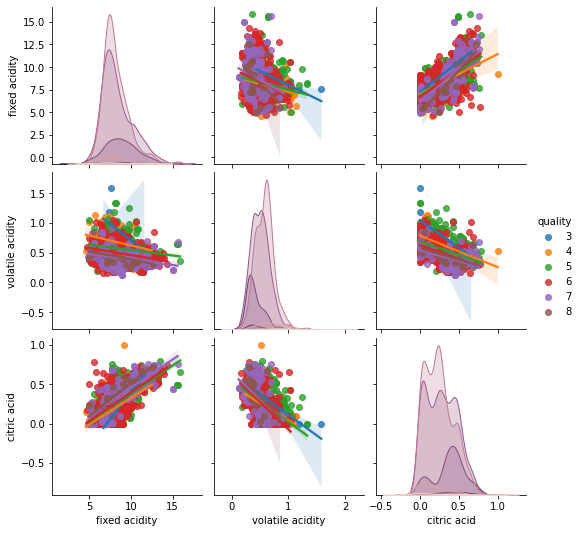

In [ ]:
# Pairwise plots 
cols2plot = ['fixed acidity' , 'volatile acidity' , 'citric acid' , 'quality']
sns.pairplot(data[cols2plot] , kind = 'reg' , hue = 'quality')
plt.show()

The idea of deeplearning is to discover relationship across the 11 different features (or N). We train the model and let deeplearning to understand the correlations and relationship across the features that we aren't aware of. 

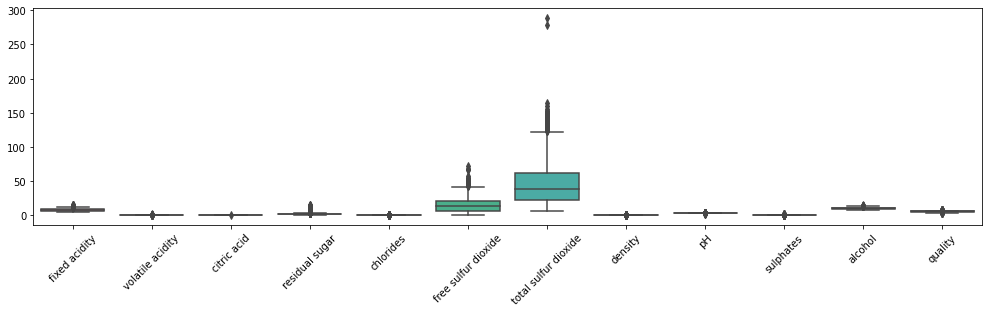

In [ ]:
# Plot some data (diversity and ranges of the features)
fig , ax = plt.subplots(1 , figsize = (17 ,4))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
plt.show()




We have to normalize the above features so they fall in the same range (roughly). We can see there are outliers for the total sulfur dioxide where the some of the values are out of bounds than the normal ranges. Unusually large data samples. 

In [ ]:
# Remove data with outliers 
data = data[data['total sulfur dioxide'] < 200]

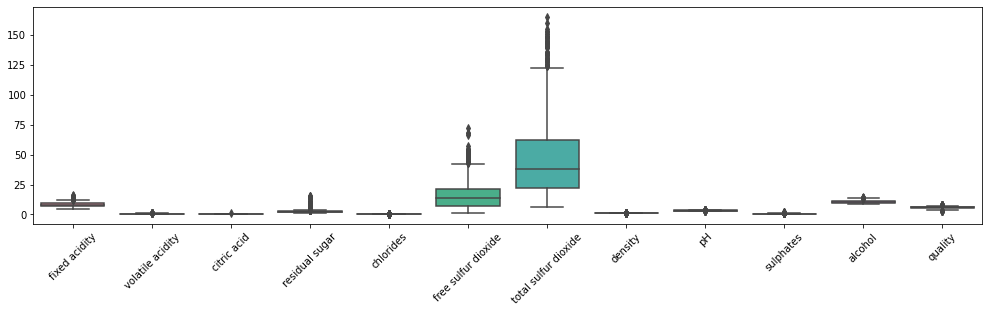

In [ ]:
# Plotting again after removing the outliers
fig , ax = plt.subplots(1 , figsize = (17 ,4))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
plt.show()




Since all the features are in different ranges lets calculate the z-score for all variables except for the quality. 

In [ ]:
# z-score for all variables 

# Find the columns we want to normalize (except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# Z-score 
for col in cols2zscore:
  meanval = np.mean(data[col])
  stdev = np.std(data[col] , ddof = 1)
  data[col] = (data[col] - meanval) / stdev

# We can also use this compact function 
#data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,-1.652668e-14,-1.793320e-15,5.880498e-15,-9.376066e-16,5.098127e-15,6.366229e-17,-1.349022e-16,4.467943e-13,-2.419966e-15,-1.921236e-15,2.247267e-14,5.634314
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.806630
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,-1.168783e+00,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,3.000000
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,-4.524372e-01,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,5.000000
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,-2.375335e-01,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,6.000000
75%,5.050372e-01,6.251419e-01,7.692848e-01,4.900487e-02,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,6.000000
max,4.350918e+00,5.876831e+00,3.753070e+00,9.289866e+00,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,8.000000



Lets plot the data features again and we can observe that they all will be roughly in same range. 

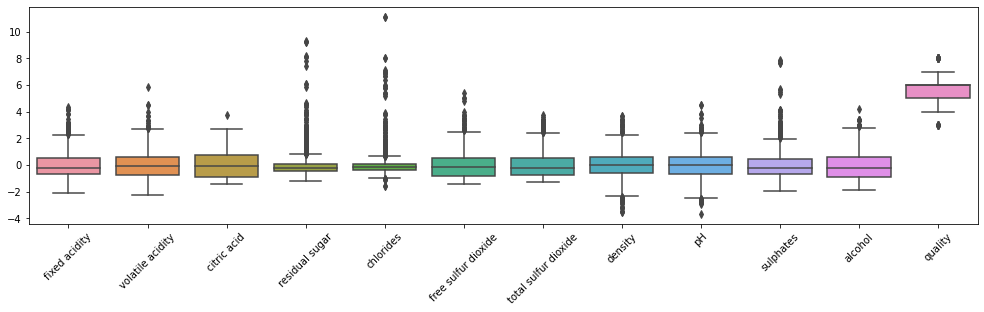

In [ ]:
# Plotting after the normalization
fig , ax = plt.subplots(1 , figsize = (17 ,4))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
plt.show()




Lets plot the distribution of the quality values

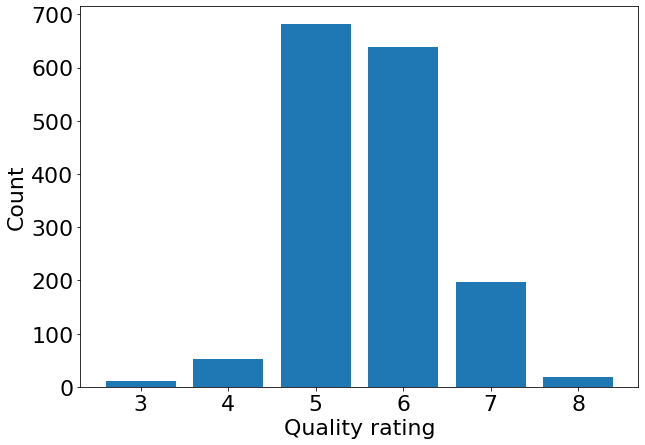

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [ ]:
# distribution quality values
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]


The `boolQuality` column contains the binarized values of the wine quality in the range of low and high quality. So now our deeplearning model will predict the low or high quality of the wine. 

In [ ]:
# Re-organize the data into train annd tes loaders 
# Convert pandas dataframe to tensor 
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data['boolQuality'].values).float()

print(dataT.shape)
print(labels.shape)

# Labels need to be in multi-dimensional tensor (not a scalar)
labels_np = np.expand_dims(labels ,axis = 1)
labels = torch.Tensor(labels_np)
labels.shape

torch.Size([1597, 11])
torch.Size([1597])


torch.Size([1597, 1])

In [ ]:
# Splitting the data into train and test 
train_data , test_data , train_labels , test_labels = train_test_split(dataT , labels , test_size = 0.2)

# Convert the above into Pytorch datasets 
train_data = TensorDataset(train_data , train_labels)
test_data = TensorDataset(test_data , test_labels)

# Translate the above tensordataset into a DataLoader 
batchsize = 64 
train_loader = DataLoader(train_data , batch_size = batchsize , shuffle = True, drop_last= True)
test_loader = DataLoader(test_data , batch_size = test_data.tensors[0].shape[0])


# Check sizes of the data batches 
for X , y in train_loader:
  print(X.shape , y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


### Code Challenge: Minibatch size in a dataset 

- Build a model to detect good or low quality wine. 
- Perform parametric experiments by varying the mini batch size used and draw a plot comparing the accuracy of both the test Vs the mini-batch size. 
- Plot between the computation time taken vs mini-batch size.

In [ ]:
# Getting the shapes of the data 
inp_shape = dataT.shape[1] 
out_shape =  labels.shape[1]

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Building the model using the class method 
class theModel(nn.Module):

  def __init__(self , in_shape , out_shape , hd_units):
    super().__init__()

    self.in_shape = inp_shape
    self.out_shape = out_shape

    self.inp_layer = nn.Linear(inp_shape , hd_units)
    self.hidden_layer = nn.Linear(hd_units , hd_units)
    self.out_layer = nn.Linear(hd_units , out_shape)

  def forward(self , x): 

    # Passing the data into a input layer 
    x = F.relu(self.inp_layer(x))

    # Passing the above output into a dropout layer 
    x = F.dropout(x , p = 0.4 , training = self.training)

    # Hidden layer after the dropout 
    x = F.relu(self.hidden_layer(x))

    # Output layer 
    x = self.out_layer(x)

    return x 

In [ ]:
# Testing on a dummy data 
tmpnet = theModel(inp_shape , out_shape , 128)


# Passing iin the dummy data to check our model 
tmpdata = torch.randn((10 , inp_shape))
yhat_ = tmpnet(tmpdata)
yhat_

tensor([[-0.1822],
        [ 0.0651],
        [ 0.0898],
        [ 0.0612],
        [-0.1575],
        [-0.0667],
        [-0.1386],
        [-0.0524],
        [-0.0419],
        [-0.2106]], grad_fn=<AddmmBackward0>)

Lets create a function that will create a model instance and returns the following:
- model 
- optimizer 
- loss function

In [ ]:
def createTheModel(inp_shape , out_shape , hd_units = 128):

  model = theModel(inp_shape , out_shape , hd_units)
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(model.parameters() , lr = .001)

  return model , lossfun , optimizer

In [ ]:
# Function for training the model 
numepochs = 500 

def trainTheModel():

  # Intialize the accuracies as empties 
  trainAcc = [] 
  testAcc = []

  # Loop over epochs 
  for epoch in range(numepochs):

    # Training model 
    model.train()

    # Loop over the batch 
    batchAcc = [] 
    
    for X , y in train_loader:

      # Forward pass 
      yHat = model(X)
      loss = lossfun(yHat , y)

      # Backprop 
      optimizer.zero_grad() 
      loss.backward()
      optimizer.step()

      # Compute training accuracy for this batch 
      batchAcc.append( 100*torch.mean(((yHat > 0) == y).float()).item())

    # Taking mean of the above train batch 
    trainAcc.append(np.mean(batchAcc))

    # Test accuracy 
    model.eval()
    X , y = next(iter(test_loader))
    yHat = model(X)
    testAcc.append( 100*torch.mean(((yHat > 0) ==y).float()).item())

  return trainAcc , testAcc


Running the parametric experiment 


In [ ]:
# Range of batch sizes 
batchsizes = 2**np.arange(1, 10)

# Initialize the output result matrices 
accuracyResultsTrain = np.zeros((numepochs , len(batchsizes)))
accuracyResultsTest = np.zeros((numepochs , len(batchsizes)))

# Loop over the batch sizes 
for bs in range(len(batchsizes)):

  # Create dataloader object 
  train_loader = DataLoader(train_data , batch_size = int(batchsizes[bs]) , shuffle = True , drop_last = True)

  # Create and train the model 
  model , lossfun , optimizer = createTheModel(inp_shape , out_shape)
  trainAcc , testAcc = trainTheModel()

  # Store the results 
  accuracyResultsTrain[: ,bs] = trainAcc
  accuracyResultsTest[: , bs] = testAcc 

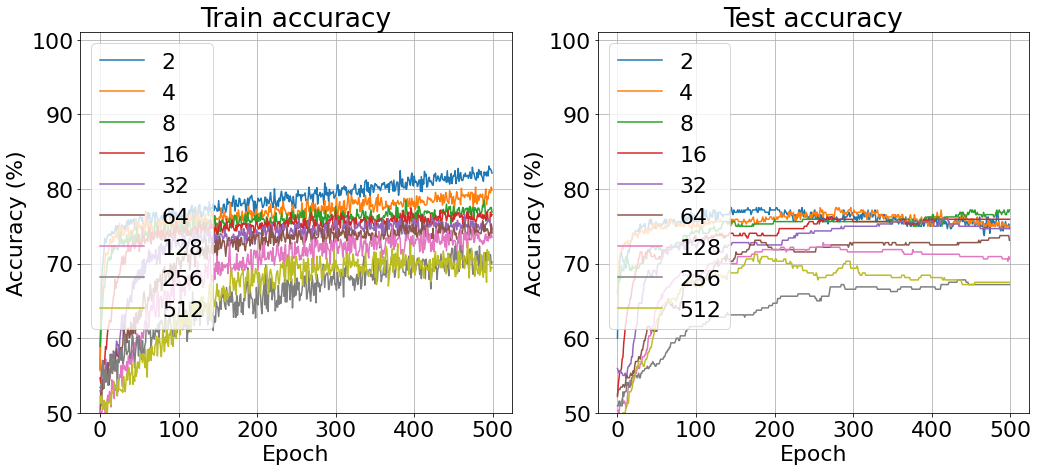

In [ ]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# common features
for i in range(2):
  ax[i].legend(batchsizes)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,101])
  ax[i].grid()

plt.show()

## Batch Normalization in Practice 



In [ ]:
# Importing the needed libraries 
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch.utils.data import DataLoader , TensorDataset
from sklearn.model_selection import train_test_split 


import numpy as np
import scipy.stats as stats 

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
from IPython import display 


In [ ]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data = data[data['total sulfur dioxide']<200] # drop a few outliers

# z-score all columns except for quality
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# Normalizing the raw data 
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
# Convert from df to tennsoors 
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data['boolQuality'].values).float()
labels = labels[:,None] # Tranform to matrix (expand_dims)

# Use sklearn to split the data 
train_data , test_data , train_labels , test_labels = train_test_split(dataT , labels , test_size = .1)

# Convert into Tensor Dataste 
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Set up the train and testing dataloaders 
train_loader = DataLoader(train_dataset , batch_size = 32 , shuffle = True , drop_last = True)
test_loader = DataLoader(test_dataset , batch_size = test_dataset.tensors[0].shape[0])

In [36]:
# lets Build a model 

class wineModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.input = nn.Linear(11 , 16)

    # Hidden layers 
    self.fc1 = nn.Linear(16 , 32)
    self.bnorm1 = nn.BatchNorm1d(16) # number of units into this layer 
    self.fc2 = nn.Linear(32 , 20)
    self.bnorm2 = nn.BatchNorm1d(32) 

    # Output layer 
    self.output = nn.Linear(20 , 1)

  # Forward pass 
  def forward(self , x ,  is_batch_norm):

    # Input (already x is normalized here)
    x = F.relu(self.input(x))

    # If batch norm exist == True 
    if is_batch_norm:

      # Hidden layer 1 
      x = self.bnorm1(x) # batch norm 
      x = self.fc1(x) # Weighted combination
      x = F.relu(x) # Activation function

      # Hidden layer 2 
      x = self.bnorm2(x) 
      x = self.fc2(x)
      x = F.relu(x)

    else: 
      # Hidden layer 
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))

    return self.output(x)



In [33]:
# Function to train the model 
numepochs = 1000

def trainModel(is_batch_norm = True):

  # Loss function and optimizer 
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(winenet.parameters() , lr = .01)

  # Initialize the losses 
  losses = torch.zeros(numepochs)
  trainAcc = [] 
  testAcc = [] 

  # Loop over the epochs 
  for epoch in range(numepochs):

    # Switch on the training mode 
    winenet.train() 

    # Loop over the training batches 
    batchAcc = []
    batchLoss = []

    for X , y in train_loader:

      # Forward pass and compute loss 
      yHat = winenet(X , is_batch_norm)
      loss = lossfun(yHat,  y)

      # Backprop 
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Accuracy and Loss from this batch 
      batchLoss.append(loss.item())
      batchAcc.append(100*torch.mean(((yHat > 0) == y).float()).item())
    # end of one batch.... 

    # Taking mean of the batches accuracies and losses 
    trainAcc.append(np.mean(batchAcc))
    losses[epoch] = np.mean(batchLoss)

    ### Test accuracy ### 

    # turn off batch norm during the evaluation / testing mode
    winenet.eval()
    X , y = next(iter(test_loader))
    
    # Also deactivate auto-grad 
    with torch.no_grad():
      yHat = winenet(X , is_batch_norm)
    testAcc.append(100*torch.mean(((yHat > 0) == y).float()).item())

  # Function output 
  return trainAcc , testAcc , losses



In [37]:
# Running the experiments 

# Create and train a model with no BATCHNORM 
winenet = wineModel()
trainAccNo , testAccNo, lossesNo = trainModel(is_batch_norm= False)

# Create and train a model with BATCHNORM 
winenet = wineModel()
trainAccWith , testAccWith , lossesWith = trainModel(is_batch_norm= True)

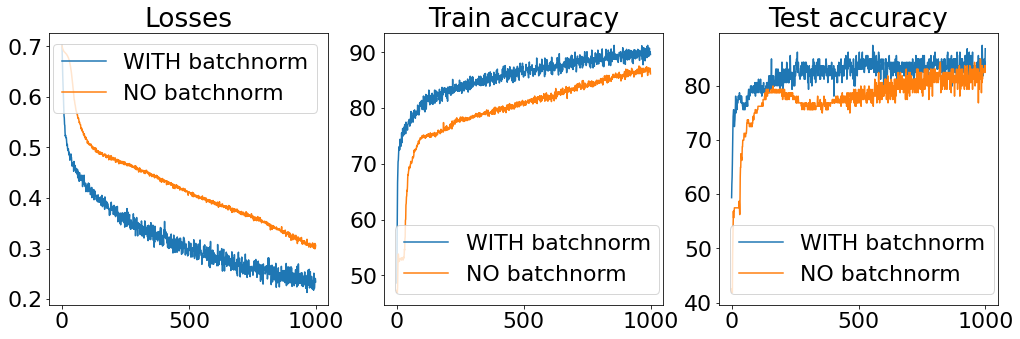

In [38]:
# plot the results
fig,ax = plt.subplots(1,3,figsize=(17,5))

ax[0].plot(lossesWith,label='WITH batchnorm')
ax[0].plot(lossesNo,label='NO batchnorm')
ax[0].set_title('Losses')
ax[0].legend()

ax[1].plot(trainAccWith,label='WITH batchnorm')
ax[1].plot(trainAccNo,label='NO batchnorm')
ax[1].set_title('Train accuracy')
ax[1].legend()

ax[2].plot(testAccWith,label='WITH batchnorm')
ax[2].plot(testAccNo,label='NO batchnorm')
ax[2].set_title('Test accuracy')
ax[2].legend()

plt.show()